## Required
- Player Count
- Total Number of Players

### Purchasing Analysis (Total)

- Number of Unique Items
- Average Purchase Price
- Total Number of Purchases
- Total Revenue

### Gender Demographics

- Percentage and Count of Male Players
- Percentage and Count of Female Players
- Percentage and Count of Other / Non-Disclosed


### Purchasing Analysis (Gender) 
**The below each broken by gender**

- Purchase Count
- Average Purchase Price
- Total Purchase Value
- Normalized Totals


### Age Demographics
**broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.) **

- Purchase Count, Average Purchase Price, Total Purchase Value, Normalized Totals

### Top 5 Spenders
Identify the the top 5 spenders in the game by total purchase value, then list (in a table):

- SN
- Purchase Count
- Average Purchase Price
- Total Purchase Value

### Most Popular Items
Identify the 5 most popular items by purchase count, then list (in a table):
- Item ID
- Item Name
- Purchase Count
- Item Price
- Total Purchase Value

### Most Profitable Items
Identify the 5 most profitable items by total purchase value, then list (in a table):
Item ID, Item Name, Purchase Count, Item Price, Total Purchase Value


In [67]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [15]:
df = pd.read_json('purchase_data.json')

In [16]:
df.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [17]:
df.shape

(780, 6)

### Total Number of Players and Player Count

In [18]:
df.SN.nunique()
#Total Number of Players

573

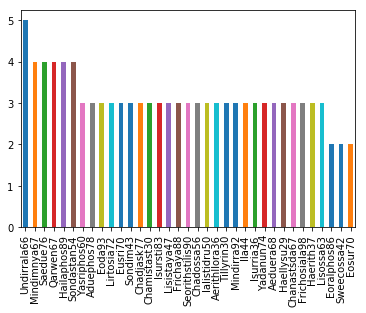

In [24]:
df.SN.value_counts().head(35).plot.bar()

In [12]:
df.dtypes

Age            int64
Gender        object
Item ID        int64
Item Name     object
Price        float64
SN            object
dtype: object

## Purchasing Analysis
**Number of Unique Items**

In [25]:
df['Item ID'].nunique()

183

**Average Purchase Price**


In [26]:
df.Price.mean()
##TODO format to currency

2.931192307692303

**Total Number of Purchases**

In [30]:
df.shape[0]

780

**Total Revenue**

In [31]:
df.Price.sum()

2286.33

## Gender Demographics
Percentage and Count of Male Players
Percentage and Count of Female Players
Percentage and Count of Other / Non-Disclosed


In [46]:
df.plot.bar?

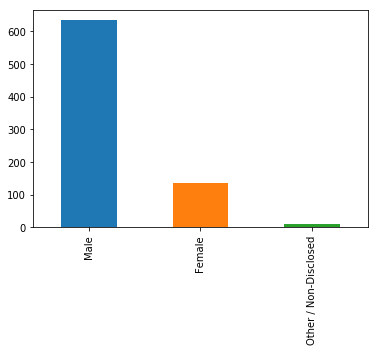

In [47]:
df.Gender.value_counts().plot.bar()
#TODO maybe one of the plotting libraries will let the y axis be percentage and then print the n's

In [38]:
633/780

0.8115384615384615

In [44]:
Purchasing Analysis (Gender)
The below each broken by gender

Purchase Count
Average Purchase Price
Total Purchase Value
Normalized Totals


In [55]:
pd.crosstab(df.Gender,df.Price.count(), normalize='all')

col_0,780
Gender,
Female,0.174359
Male,0.811538
Other / Non-Disclosed,0.014103


In [91]:
df.query('Gender == "Male"').size
#TODO groupby gender and screen name otherwise 

4431

In [63]:
df.query('Gender == "Female"').size

816

In [64]:
import seaborn as sns

In [73]:
df.groupby('Gender').Price.mean()

Gender
Female                   2.815515
Male                     2.950521
Other / Non-Disclosed    3.249091
Name: Price, dtype: float64

In [86]:
pd.pivot_table(df, index='Gender', aggfunc='sum')

,Age,Item ID,Price,percent_of_total
Gender,,,,
Female,3068,11983,382.91,0.167478
Male,14360,57965,1867.68,0.816890
Other / Non-Disclosed,301,1261,35.74,0.015632


In [82]:
df['percent_of_total']=df['Price']/df.Price.sum()

In [83]:
df.percent_of_total.head()
#TODO need to groupby SN first

0    0.001474
1    0.001015
2    0.001076
3    0.000595
4    0.000555
Name: percent_of_total, dtype: float64

In [85]:
#pd.pivot_table(df, index="SN", aggfunc='sum')

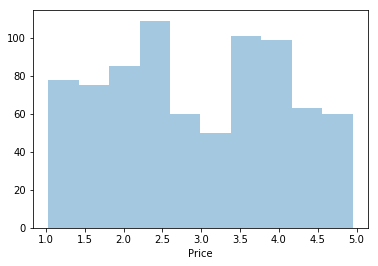

In [87]:
sns.distplot(df['Price'], bins=10, kde=False)

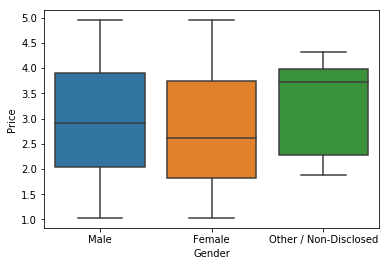

In [88]:
sns.boxplot(
    x='Gender',
    y='Price',
    data=df
)



    Normalized Total = Total Purchase Value /n of Unique Users, 
    whereas  Average Purchase Price = Total Purchase Value / Purchase Count.

In [93]:
df.Price.sum()/df.SN.nunique()
#normalized total only i haven't normalized those values 

3.9901047120418847

## Age

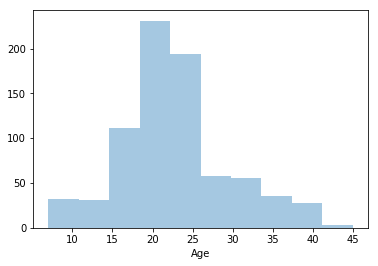

In [94]:
sns.distplot(df['Age'], bins=10, kde=False)

In [98]:
import numpy as np

In [99]:
#break into bins of 4 years
#AND we need SN unique. 
bins = [i for i in np.arange(0,50,4)]
df['bins'] = pd.cut(df['Age'], bins=bins)

In [100]:
df.head()

,Age,Gender,Item ID,Item Name,Price,SN,percent_of_total,bins
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,0.001474,"(36, 40]"
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,0.001015,"(20, 24]"
2,34,Male,174,Primitive Blade,2.46,Assastnya25,0.001076,"(32, 36]"
3,21,Male,92,Final Critic,1.36,Pheusrical25,0.000595,"(20, 24]"
4,23,Male,63,Stormfury Mace,1.27,Aela59,0.000555,"(20, 24]"


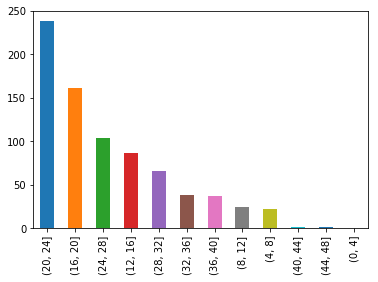

In [105]:
df.bins.value_counts().plot.bar()

## Identify the 5 most popular items by purchase count, then list (in a table):

Item ID,
Item Name,
Purchase Count,
Item Price,
Total Purchase Value,

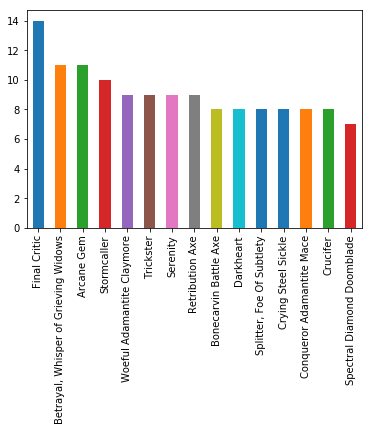

In [116]:
df['Item Name'].value_counts().head(15).plot.bar()

In [136]:
top_5_df = df[df['Item Name'.value_counts() > 8]]
#mask = [df[Item]


AttributeError: 'str' object has no attribute 'value_counts'

In [121]:
group = df.groupby(['Item Name', 'Price']).count().reset_index()
#sort_values

In [122]:
group.head()

,Item Name,Price,Age,Gender,Item ID,SN,percent_of_total,bins
0,Abyssal Shard,2.04,3,3,3,3,3,3
1,"Aetherius, Boon of the Blessed",4.75,4,4,4,4,4,4
2,Agatha,1.91,5,5,5,5,5,5
3,Alpha,1.56,7,7,7,7,7,7
4,"Alpha, Oath of Zeal",2.88,7,7,7,7,7,7


In [145]:
# filter_list = list(range(1,4))
# mask3 = joined['prod_id'].isin(filter_list)
# joined[mask3]

#mask1 = df['Item Name'].value_counts() > 8

In [162]:
# mask1 = df['Item Name'].value_counts() > 8
# mask1.head(10)

Final Critic                             True
Betrayal, Whisper of Grieving Widows     True
Arcane Gem                               True
Stormcaller                              True
Woeful Adamantite Claymore               True
Trickster                                True
Serenity                                 True
Retribution Axe                          True
Bonecarvin Battle Axe                   False
Darkheart                               False
Name: Item Name, dtype: bool

In [156]:
#df['top_5_mask'] = mask1.astype(bool)

In [160]:
#df.head()

,Age,Gender,Item ID,Item Name,Price,SN,percent_of_total,bins,top_5_mask,top5mask
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,0.001474,"(36, 40]",NaN,NaN
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,0.001015,"(20, 24]",NaN,NaN
2,34,Male,174,Primitive Blade,2.46,Assastnya25,0.001076,"(32, 36]",NaN,NaN
3,21,Male,92,Final Critic,1.36,Pheusrical25,0.000595,"(20, 24]",NaN,NaN
4,23,Male,63,Stormfury Mace,1.27,Aela59,0.000555,"(20, 24]",NaN,NaN


In [155]:
#df.dtypes

Age                    int64
Gender                object
Item ID                int64
Item Name             object
Price                float64
SN                    object
percent_of_total     float64
bins                category
top_5_mask            object
dtype: object

In [158]:
#mask1.dtype

dtype('bool')

In [163]:
top_5_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())

In [164]:
top_5_items

['Final Critic',
 'Betrayal, Whisper of Grieving Widows',
 'Arcane Gem',
 'Stormcaller',
 'Woeful Adamantite Claymore',
 'Trickster',
 'Serenity',
 'Retribution Axe']

In [165]:
mask = df['Item Name'].isin(top_5_items)

In [169]:
top_items_df = group[mask]

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [170]:
top_items_df

,Item Name,Price,Age,Gender,Item ID,SN,percent_of_total,bins
3,Alpha,1.56,7,7,7,7,7,7
35,Dawne,4.30,5,5,5,5,5,5
54,"Fate, Vengeance of Eternal Justice",1.55,4,4,4,4,4,4
56,Fiery Glass Crusader,4.45,6,6,6,6,6,6
57,Final Critic,1.36,8,8,8,8,8,8
61,Foul Titanium Battle Axe,4.33,2,2,2,2,2,2
62,"Freak's Bite, Favor of Holy Might",3.03,2,2,2,2,2,2
66,Fusion Pummel,3.58,2,2,2,2,2,2
75,Heartless Bone Dualblade,2.63,3,3,3,3,3,3
81,Hopeless Ebon Dualblade,4.75,5,5,5,5,5,5
